In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
#import loompy
import matplotlib as mpl
import harmonypy as hm
import matplotlib.pyplot as plt

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.settings.set_figure_params(dpi=80, color_map='viridis')
#sc.logging.print_versions()

In [2]:
input_file = './CTCL/object_revision/all_tumourcell_raw_20240707.h5ad'
adata = sc.read_h5ad(input_file)

In [3]:
adata

AnnData object with n_obs × n_vars = 132195 × 15649
    obs: 'Sanger_ID', 'tissue', 'site', 'Sex', 'batch', 'n_counts', 'n_genes', 'percent_mito', 'study', 'donor', 'tech', 'cell_type', 'barcode', 'type', 'donor_id', 'sample'
    var: 'gene_ids-1', 'feature_types-1'

In [4]:
#adata.obs['donor'].value_counts()

In [5]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

normalizing by total count per cell
    finished (0:00:02): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [6]:
stage = pd.read_csv("./CTCL/script_revision/tumour_stage.csv")
stage

,donor,stage,stage_donor
0,CTCL1,late,late_CTCL1
1,CTCL2,early,early_CTCL2
2,CTCL3,early,early_CTCL3
3,CTCL4,early,early_CTCL4
4,CTCL5,late,late_CTCL5
5,CTCL6,early,early_CTCL6
6,CTCL7,early,early_CTCL7
7,CTCL8,early,early_CTCL8
8,MF28,late,late_MF28
9,MF14,early,early_MF14


In [7]:
adata.obs['stage_donor'] = adata.obs['donor'].copy()
ID = stage['donor'].tolist()
replacement = stage['stage_donor'].tolist()
adata.obs['stage_donor'].replace(to_replace=ID, value=replacement, inplace=True)

In [8]:
adata.obs

,Sanger_ID,tissue,site,Sex,batch,n_counts,n_genes,percent_mito,study,donor,tech,cell_type,barcode,type,donor_id,sample,stage_donor
AAACCTGAGCCAACAG-0_CTCL1_CTCL1_CTCL1-0,WSSS_SKN8090612,Epidermis,lesion,Female,0,845.0,633.0,0.003510,8_CTCL,CTCL1,10x,tumor_cell,AAACCTGAGCCAACAG-0,tumor_cell,NaN,NaN,late_CTCL1
AACTTTCTCTATGTGG-0_CTCL1_CTCL1_CTCL1-0,WSSS_SKN8090612,Epidermis,lesion,Female,0,6080.0,2837.0,0.003432,8_CTCL,CTCL1,10x,tumor_cell,AACTTTCTCTATGTGG-0,tumor_cell,NaN,NaN,late_CTCL1
AAGCCGCAGAAACGAG-0_CTCL1_CTCL1_CTCL1-0,WSSS_SKN8090612,Epidermis,lesion,Female,0,1318.0,1119.0,0.000000,8_CTCL,CTCL1,10x,tumor_cell,AAGCCGCAGAAACGAG-0,tumor_cell,NaN,NaN,late_CTCL1
AAGGAGCAGACAGGCT-0_CTCL1_CTCL1_CTCL1-0,WSSS_SKN8090612,Epidermis,lesion,Female,0,4642.0,2518.0,0.004863,8_CTCL,CTCL1,10x,tumor_cell,AAGGAGCAGACAGGCT-0,tumor_cell,NaN,NaN,late_CTCL1
AATCCAGTCACGAAGG-0_CTCL1_CTCL1_CTCL1-0,WSSS_SKN8090612,Epidermis,lesion,Female,0,892.0,833.0,0.013457,8_CTCL,CTCL1,10x,tumor_cell,AATCCAGTCACGAAGG-0,tumor_cell,NaN,NaN,late_CTCL1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGAGAGGCATCCGGGT-1-P90-1,NaN,NaN,NaN,NaN,1,1536.0,NaN,NaN,Vienna,P90,10X,NaN,NaN,Tu,P90,P90_lesional,early_P90
TGAGGGAGTAATCGTC-1-P90-1,NaN,NaN,NaN,NaN,1,2568.0,NaN,NaN,Vienna,P90,10X,NaN,NaN,Tu,P90,P90_lesional,early_P90
TTCCCAGTCGCTTGTC-1-P90-1,NaN,NaN,NaN,NaN,1,1348.0,NaN,NaN,Vienna,P90,10X,NaN,NaN,Tu,P90,P90_lesional,early_P90
TTCTTAGAGTGTGGCA-1-P90-1,NaN,NaN,NaN,NaN,1,1972.0,NaN,NaN,Vienna,P90,10X,NaN,NaN,Tu,P90,P90_lesional,early_P90


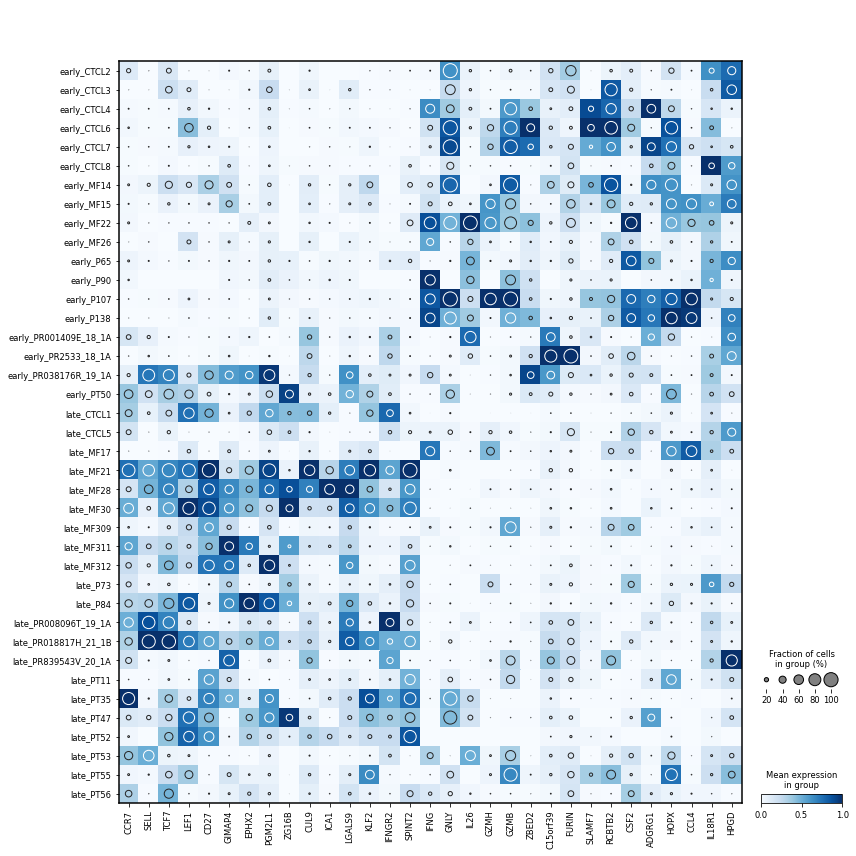

In [30]:
genes = ['CCR7','SELL','TCF7','LEF1','CD27','GIMAP4','EPHX2','PGM2L1','ZG16B','CUL9','ICA1','LGALS9','KLF2','IFNGR2','SPINT2',
         'IFNG','GNLY','IL26','GZMH','GZMB','ZBED2','C15orf39','FURIN','SLAMF7','RCBTB2','CSF2','ADGRG1','HOPX','CCL4','IL18R1','HPGD']
dp = sc.pl.dotplot(adata, var_names=genes, groupby='stage_donor',dendrogram=False,
                   standard_scale='var',use_raw=True,var_group_rotation=0,swap_axes=False,return_fig=True)
dp.style(cmap='Blues',color_on='square',dot_edge_color=None,dot_edge_lw=1)
dp.savefig('./figures/Gene_early_late_stage_20240707.pdf')